In [55]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [56]:
df=pd.read_csv("USDUAH=X.csv")

In [57]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,01-01-2004,5.1899,5.3805,5.1823,5.1861,5.1861,0
1,01-02-2004,5.1851,5.3281,5.1851,5.1892,5.1892,0
2,01-03-2004,5.1897,5.2034,5.1774,5.1851,5.1851,0
3,01-04-2004,5.1896,5.3002,5.1727,5.1634,5.1634,0
4,01-05-2004,5.1756,5.1897,5.1714,5.1765,5.1765,0


In [58]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
219,01-04-2022,29.322329,30.169123,28.966681,29.940037,29.940037,0
220,01-05-2022,29.914839,30.164694,28.884439,29.253878,29.253878,0
221,01-06-2022,29.175615,29.563314,28.882143,29.221329,29.221329,0
222,01-07-2022,29.036173,29.459877,29.036173,29.226076,29.226076,0
223,18-07-2022,29.540199,29.540199,29.540199,29.540199,29.540199,0


In [59]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.0
mean,14.724109,15.170152,14.427453,14.865789,14.865789,0.0
std,9.629706,9.880683,9.410650,9.705628,9.705628,0.0
min,4.537500,4.625000,4.447500,4.482900,4.482900,0.0
25%,5.212700,5.367875,5.181075,5.257900,5.257900,0.0
50%,8.075650,8.207550,8.002500,8.085100,8.085100,0.0
75%,26.008501,26.604000,25.475750,26.022250,26.022250,0.0
max,29.914839,33.901001,29.540199,33.499001,33.499001,0.0


In [60]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [61]:
df.Date=pd.to_datetime(df.Date, dayfirst=True)

In [62]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2004-01-01,5.1899,5.3805,5.1823,5.1861,5.1861,0
1,2004-02-01,5.1851,5.3281,5.1851,5.1892,5.1892,0
2,2004-03-01,5.1897,5.2034,5.1774,5.1851,5.1851,0
3,2004-04-01,5.1896,5.3002,5.1727,5.1634,5.1634,0
4,2004-05-01,5.1756,5.1897,5.1714,5.1765,5.1765,0


In [63]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.0
mean,14.724109,15.170152,14.427453,14.865789,14.865789,0.0
std,9.629706,9.880683,9.410650,9.705628,9.705628,0.0
min,4.537500,4.625000,4.447500,4.482900,4.482900,0.0
25%,5.212700,5.367875,5.181075,5.257900,5.257900,0.0
50%,8.075650,8.207550,8.002500,8.085100,8.085100,0.0
75%,26.008501,26.604000,25.475750,26.022250,26.022250,0.0
max,29.914839,33.901001,29.540199,33.499001,33.499001,0.0


In [64]:
df.Date.describe()

count                     224
unique                    224
top       2004-01-01 00:00:00
freq                        1
first     2004-01-01 00:00:00
last      2022-07-18 00:00:00
Name: Date, dtype: object

In [65]:
df.set_index("Date",inplace = True)

In [66]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2004-01-01,5.1899,5.3805,5.1823,5.1861,5.1861,0
2004-02-01,5.1851,5.3281,5.1851,5.1892,5.1892,0
2004-03-01,5.1897,5.2034,5.1774,5.1851,5.1851,0
2004-04-01,5.1896,5.3002,5.1727,5.1634,5.1634,0
2004-05-01,5.1756,5.1897,5.1714,5.1765,5.1765,0


<AxesSubplot:xlabel='Date'>

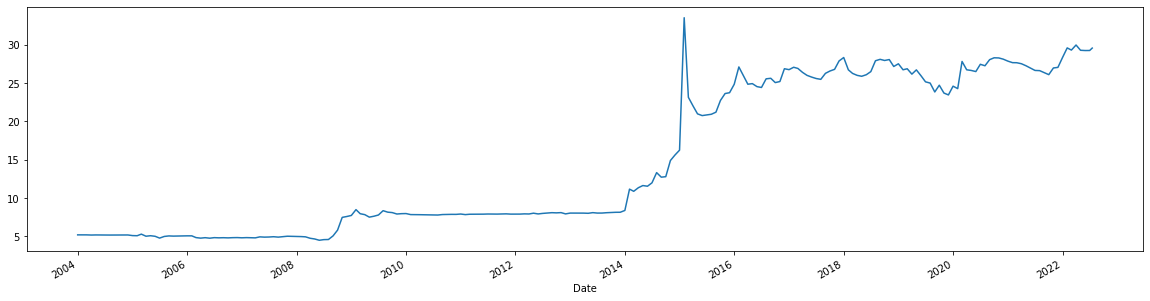

In [67]:
df.Adj_Close.plot(figsize=(20,5))

In [68]:
del df['Open'],df['High'],df['Low'],df['Close'],df['Volume']

In [69]:
df.head()

,Adj_Close
Date,
2004-01-01,5.1861
2004-02-01,5.1892
2004-03-01,5.1851
2004-04-01,5.1634
2004-05-01,5.1765


In [70]:
size = int(len(df)*0.8)

In [71]:
df_train = df.iloc[:size]
df_test = df.iloc[size:]

### Checking Stationarity

In [72]:
import statsmodels.tsa.stattools as sts

In [73]:
sts.adfuller(df_train.Adj_Close)

(0.22524962793395217,
 0.9736427380386022,
 2,
 176,
 {'1%': -3.4680615871598537,
  '5%': -2.8781061899535128,
  '10%': -2.5756015922004134},
 616.817681496378)

In [74]:
#2- autocorrelation at lag of 2
# data is non stationary

### White Noise

In [75]:
import numpy as np
wn = np.random.normal(loc = df_train.Adj_Close.mean(),scale = df_train.std(), size = len(df_train))

In [76]:
df_train['wn'] = wn

In [77]:
df_train.head()

,Adj_Close,wn
Date,,
2004-01-01,5.1861,13.254586
2004-02-01,5.1892,15.223815
2004-03-01,5.1851,7.681252
2004-04-01,5.1634,8.599160
2004-05-01,5.1765,-8.702735


In [78]:
sts.adfuller(df_train.wn)

(-12.118153704183603,
 1.8517122513016482e-22,
 0,
 178,
 {'1%': -3.467631519151906,
  '5%': -2.8779183721695567,
  '10%': -2.575501353364474},
 1168.449600479213)

### ACF - autocorrelation

In [79]:
import statsmodels.graphics.tsaplots as sgt

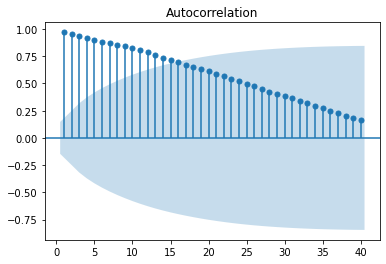

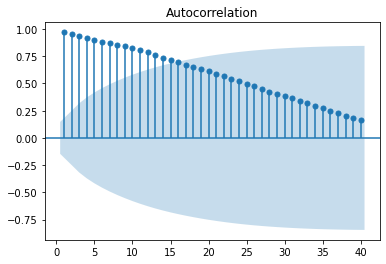

In [80]:
sgt.plot_acf(df_train.Adj_Close, lags = 40,zero=False)

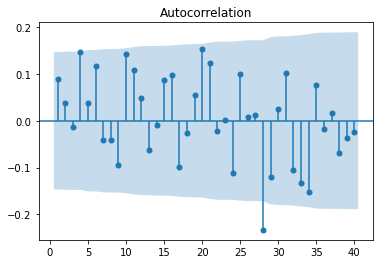

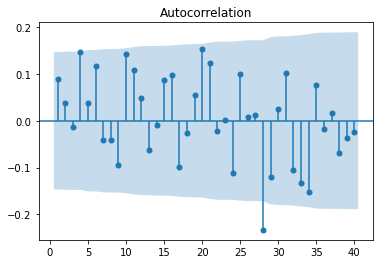

In [81]:
sgt.plot_acf(df_train.wn, lags = 40,zero=False)

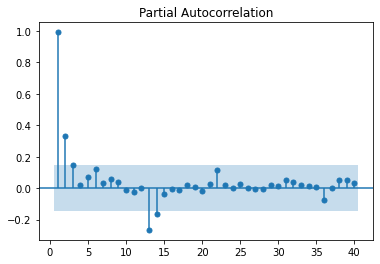

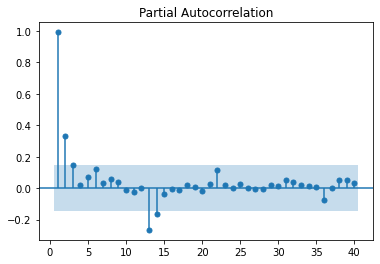

In [82]:
sgt.plot_pacf(df_train.Adj_Close, lags=40,zero = False,method =('ols'))

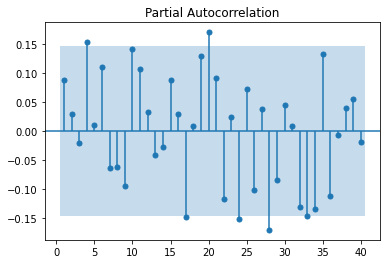

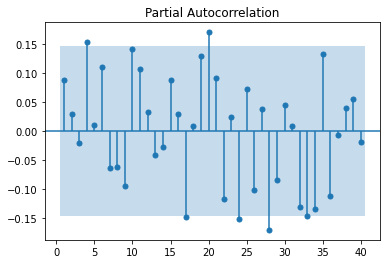

In [83]:
sgt.plot_pacf(df_train.wn, lags=40,zero = False,method =('ols'))

In [84]:
# LLR test can only be applied on model with different degree of freedom
# hence model with same number of lags is to be compare based on information criteria
# like AIC and BIC ( lower is better)
# prefer model with higher log-likelidhood

### AR (Auto regressivee Model)

In [85]:
# A linear model, where current period values are a sum of past outcomes
# multiplied by a numeric factor

In [86]:
from statsmodels.tsa.arima_model import ARMA

In [87]:
model_ar1 = ARMA(df_train.Adj_Close, order=(1,0))
results_ar1 = model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                     ARMA(1, 0)   Log Likelihood                -339.167
Method:                       css-mle   S.D. of innovations              1.593
Date:                Mon, 18 Jul 2022   AIC                            684.335
Time:                        18:07:42   BIC                            693.897
Sample:                    01-01-2004   HQIC                           688.212
                         - 11-01-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.9472      6.520      2.139      0.032       1.169      26.725
ar.L1.Adj_Close     0.9862      0.011     86.026      0.000       0.964       1.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0140           +0.0000j            1.0140            0.0000
-----------------------------------------------------------------------------
"""

In [88]:
model_ar2 = ARMA(df_train.Adj_Close, order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                     ARMA(2, 0)   Log Likelihood                -329.783
Method:                       css-mle   S.D. of innovations              1.510
Date:                Mon, 18 Jul 2022   AIC                            667.566
Time:                        18:07:42   BIC                            680.316
Sample:                    01-01-2004   HQIC                           672.736
                         - 11-01-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.8649      8.263      1.799      0.072      -1.331      31.060
ar.L1.Adj_Close     0.6755      0.071      9.569      0.000       0.537       0.814
ar.L2.Adj_Close     0.3162      0.071      4.458      0.000       0.177       0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0063           +0.0000j            1.0063            0.0000
AR.2           -3.1430           +0.0000j            3.1430            0.5000
-----------------------------------------------------------------------------
"""

In [89]:
model_ar3 = ARMA(df_train.Adj_Close, order=(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                     ARMA(3, 0)   Log Likelihood                -328.419
Method:                       css-mle   S.D. of innovations              1.499
Date:                Mon, 18 Jul 2022   AIC                            666.837
Time:                        18:07:42   BIC                            682.774
Sample:                    01-01-2004   HQIC                           673.300
                         - 11-01-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.1753      8.830      1.719      0.086      -2.130      32.481
ar.L1.Adj_Close     0.6362      0.074      8.596      0.000       0.491       0.781
ar.L2.Adj_Close     0.2340      0.086      2.717      0.007       0.065       0.403
ar.L3.Adj_Close     0.1229      0.074      1.659      0.097      -0.022       0.268
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0047           -0.0000j            1.0047           -0.0000
AR.2           -1.4545           -2.4464j            2.8461           -0.3354
AR.3           -1.4545           +2.4464j            2.8461            0.3354
-----------------------------------------------------------------------------
"""

### LLR test

In [90]:
from scipy.stats.distributions import chi2

In [91]:
def LLR_test(mod_1,mod_2, DF=1): #DF is the degrees of freedom or no. of lags
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p= chi2.sf(LR,DF).round(3)
    return p
    

In [92]:
LLR_test(model_ar1,model_ar2)

0.0

In [93]:
LLR_test(model_ar2,model_ar3)

0.099

Hence we opt for AR model with 2 lags

In [94]:
model_ar4= ARMA(df_train.Adj_Close, order=(4,0))
results_ar4=model_ar4.fit()
print(results_ar4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar3,model_ar4)))

                              ARMA Model Results                              
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                     ARMA(4, 0)   Log Likelihood                -328.417
Method:                       css-mle   S.D. of innovations              1.499
Date:                Mon, 18 Jul 2022   AIC                            668.835
Time:                        18:07:43   BIC                            687.959
Sample:                    01-01-2004   HQIC                           676.590
                         - 11-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.1663      8.815      1.721      0.085      -2.111      32.443
ar.L1.Adj_Close     0.6367      0.075      8.533      0.000       0.490       0.783
ar.L2.Adj_Close     0.2349      

### Residuals

In [95]:
df_train["res"] = results_ar2.resid

In [96]:
sts.adfuller(df_train.res)

(-11.081451208862422,
 4.3010466853111833e-20,
 1,
 177,
 {'1%': -3.467845319799907,
  '5%': -2.878011745497439,
  '10%': -2.575551186759871},
 615.5917076559588)

### MA moving average model

In [97]:
model_ma1= ARMA(df_train.Adj_Close, order=(0,1))
results_ma1=model_ma1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                     ARMA(0, 1)   Log Likelihood                -540.427
Method:                       css-mle   S.D. of innovations              4.937
Date:                Mon, 18 Jul 2022   AIC                           1086.855
Time:                        18:07:43   BIC                           1096.417
Sample:                    01-01-2004   HQIC                          1090.732
                         - 11-01-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.8382      0.676     17.516      0.000      10.514      13.163
ma.L1.Adj_Close     0.8360      0.028     29.461      0.000       0.780       0.892
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1961           +0.0000j            1.1961            0.5000
-----------------------------------------------------------------------------
"""

In [98]:
model_ma2= ARMA(df_train.Adj_Close, order=(0,2))
results_ma2=model_ma2.fit()
print(results_ma2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ma1,model_ma2)))

                              ARMA Model Results                              
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                     ARMA(0, 2)   Log Likelihood                -482.046
Method:                       css-mle   S.D. of innovations              3.556
Date:                Mon, 18 Jul 2022   AIC                            972.093
Time:                        18:07:43   BIC                            984.842
Sample:                    01-01-2004   HQIC                           977.263
                         - 11-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.8660      0.763     15.552      0.000      10.371      13.361
ma.L1.Adj_Close     1.2030      0.056     21.462      0.000       1.093       1.313
ma.L2.Adj_Close     0.6822      

In [99]:
model_ma3= ARMA(df_train.Adj_Close, order=(0,3))
results_ma3=model_ma3.fit()
print(results_ma3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ma2,model_ma3)))

                              ARMA Model Results                              
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                     ARMA(0, 3)   Log Likelihood                -444.580
Method:                       css-mle   S.D. of innovations              2.880
Date:                Mon, 18 Jul 2022   AIC                            899.159
Time:                        18:07:44   BIC                            915.096
Sample:                    01-01-2004   HQIC                           905.621
                         - 11-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.8920      0.834     14.252      0.000      10.257      13.527
ma.L1.Adj_Close     1.2047      0.060     19.993      0.000       1.087       1.323
ma.L2.Adj_Close     1.0983      

In [100]:
model_ma12= ARMA(df_train.Adj_Close, order=(0,12))
results_ma12=model_ma12.fit()
print(results_ma12.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ma3,model_ma12,9)))

                              ARMA Model Results                              
Dep. Variable:              Adj_Close   No. Observations:                  179
Model:                    ARMA(0, 12)   Log Likelihood                -355.880
Method:                       css-mle   S.D. of innovations              1.748
Date:                Mon, 18 Jul 2022   AIC                            739.760
Time:                        18:07:53   BIC                            784.383
Sample:                    01-01-2004   HQIC                           757.854
                         - 11-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.0487      1.482      8.131      0.000       9.144      14.953
ma.L1.Adj_Close      0.9225      0.079     11.737      0.000       0.768       1.077
ma.L2.Adj_Close      1.1328 

### ARMA model

In [101]:
# model_ar1_ma1 = ARMA(df_train.Adj_Close, order = (1,2))
# results_ar1_ma1 = model_ar1_ma1.fit()
# results_ar1_ma1.summary()

### Difference

In [102]:
df_train["returns"] = df_train.Adj_Close.pct_change(1).mul(100)
df_test["returns"] = df_test.Adj_Close.pct_change(1).mul(100)

In [103]:
df_train.head()

,Adj_Close,wn,res,returns
Date,,,,
2004-01-01,5.1861,13.254586,-9.678780,NaN
2004-02-01,5.1892,15.223815,-0.114566,0.059775
2004-03-01,5.1851,7.681252,-0.083559,-0.079010
2004-04-01,5.1634,8.599160,-0.103469,-0.418507
2004-05-01,5.1765,-8.702735,-0.074414,0.253709


In [104]:
sts.adfuller(df_train.returns[1:])

(-15.252178951746169,
 4.991764360458611e-28,
 0,
 177,
 {'1%': -3.467845319799907,
  '5%': -2.878011745497439,
  '10%': -2.575551186759871},
 1206.1051081725288)

In [105]:
model_ret_ar1_ma1 = ARMA(df_train.returns[1:], order = (2,2))
results_ret_ar1_ma1 = model_ret_ar1_ma1.fit()
results_ret_ar1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                  178
Model:                     ARMA(2, 2)   Log Likelihood                -647.139
Method:                       css-mle   S.D. of innovations              9.169
Date:                Mon, 18 Jul 2022   AIC                           1306.277
Time:                        18:08:06   BIC                           1325.368
Sample:                    02-01-2004   HQIC                          1314.019
                         - 11-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2597      0.684      1.842      0.065      -0.081       2.600
ar.L1.returns     0.2728      0.120      2.268      0.023       0.037       0.509
ar.L2.returns    -0.7734      0.144     -5.361      0.000      -1.056      -0.491
ma.L1.returns    -0.3746      0.095     -3.923      0.000      -0.562      -0.187
ma.L2.returns     0.8682      0.112      7.768      0.000       0.649       1.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1764           -1.1233j            1.1371           -0.2252
AR.2            0.1764           +1.1233j            1.1371            0.2252
MA.1            0.2157           -1.0513j            1.0732           -0.2178
MA.2            0.2157           +1.0513j            1.0732            0.2178
-----------------------------------------------------------------------------
"""

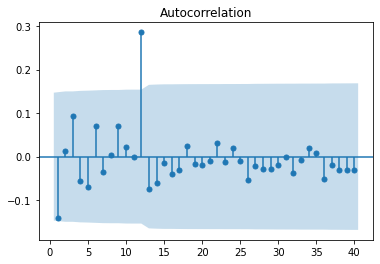

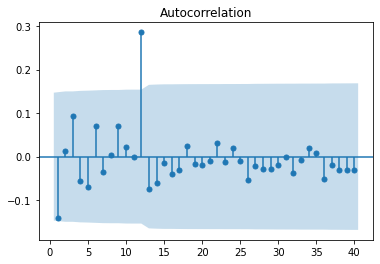

In [106]:
sgt.plot_acf(df_train.returns[1:], lags=40,zero=False)

### ARIMA model

In [107]:
from statsmodels.tsa.arima_model import ARIMA

In [108]:
model_ar1_i1_ma1=ARIMA(df_train.Adj_Close, order = (1,1,1))
results_ar1_i1_ma1 = model_ar1_i1_ma1.fit()
results_ar1_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj_Close   No. Observations:                  178
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -322.918
Method:                       css-mle   S.D. of innovations              1.484
Date:                Mon, 18 Jul 2022   AIC                            653.835
Time:                        18:08:06   BIC                            666.562
Sample:                    02-01-2004   HQIC                           658.996
                         - 11-01-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1290      0.063      2.050      0.040       0.006       0.252
ar.L1.D.Adj_Close     0.1203      0.223      0.539      0.590      -0.317       0.558
ma.L1.D.Adj_Close    -0.5049      0.201     -2.514      0.012      -0.898      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.3140           +0.0000j            8.3140            0.0000
MA.1            1.9808           +0.0000j            1.9808            0.0000
-----------------------------------------------------------------------------
"""

In [110]:
model_ar2_i1_ma2=ARIMA(df_train.Adj_Close, order = (2,1,2))
results_ar2_i1_ma2 = model_ar1_i1_ma3.fit(start_ar_lags=4)
results_ar2_i1_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj_Close   No. Observations:                  178
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -322.621
Method:                       css-mle   S.D. of innovations              1.481
Date:                Mon, 18 Jul 2022   AIC                            657.243
Time:                        18:08:07   BIC                            676.334
Sample:                    02-01-2004   HQIC                           664.985
                         - 11-01-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1289      0.060      2.166      0.030       0.012       0.246
ar.L1.D.Adj_Close     0.4428      0.427      1.036      0.300      -0.395       1.280
ma.L1.D.Adj_Close    -0.8360      0.427     -1.959      0.050      -1.672       0.000
ma.L2.D.Adj_Close     0.1684      0.197      0.855      0.392      -0.218       0.554
ma.L3.D.Adj_Close    -0.0358      0.077     -0.464      0.643      -0.187       0.116
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2582           +0.0000j            2.2582            0.0000
MA.1            1.5070           -0.0000j            1.5070           -0.0000
MA.2            1.5957           -3.9958j            4.3027           -0.1895
MA.3            1.5957           +3.9958j            4.3027            0.1895
-----------------------------------------------------------------------------
"""

### Forecasting

In [113]:
start_date= "2018-12-01"
end_date="2022-07-18"

In [114]:
df_pred = results_ret_ar1_ma1.predict(start = start_date, end=end_date)

<AxesSubplot:xlabel='Date'>

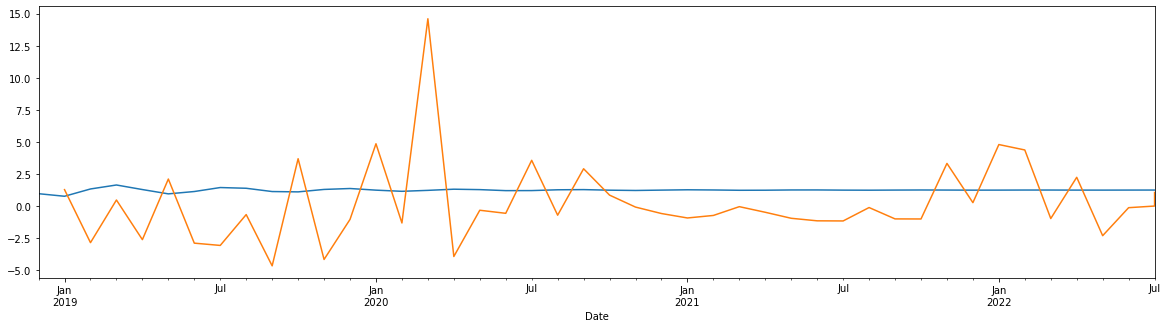

In [115]:
df_pred[start_date:end_date].plot(figsize = (20,5))
df_test.returns.plot(figsize=(20,5))

### MA

<AxesSubplot:xlabel='Date'>

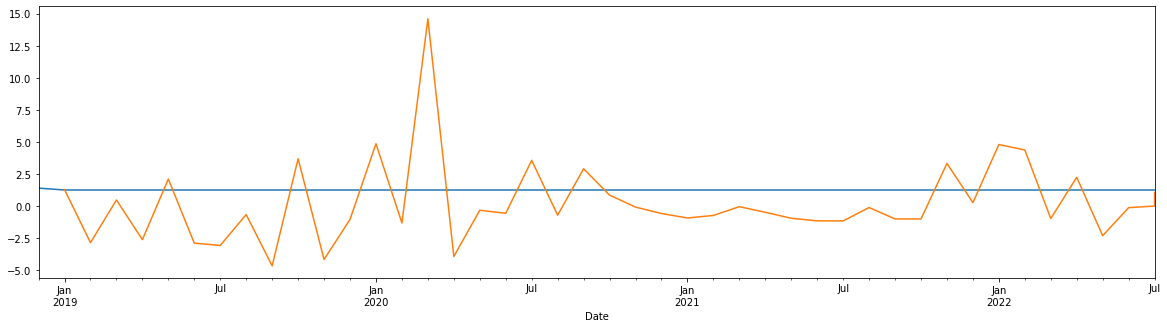

In [116]:
model_ret_ma=ARIMA(df_train.returns[1:], order=(0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start =start_date, end = end_date)

df_pred_ma[start_date:end_date].plot(figsize = (20,5))
df_test.returns.plot(figsize=(20,5))

### ARMA

<AxesSubplot:xlabel='Date'>

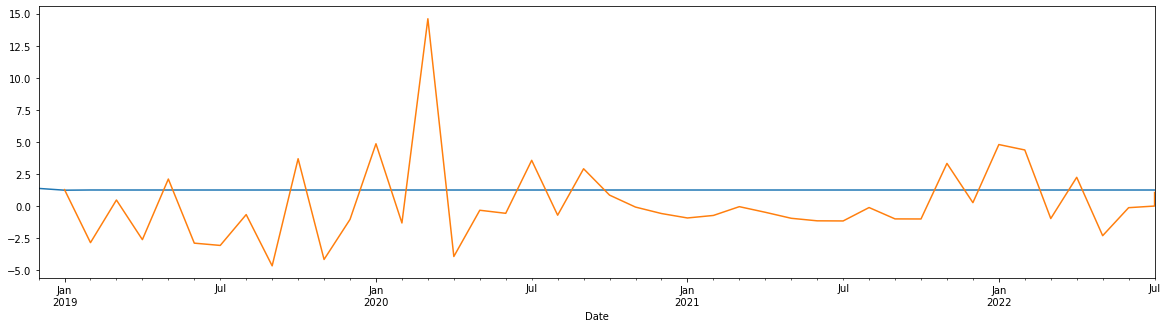

In [117]:
model_ret_arma=ARIMA(df_train.returns[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start =start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5))
df_test.returns.plot(figsize=(20,5))

In [118]:
df_pred_arma.head()

2018-12-01    1.389793
2019-01-01    1.250585
2019-02-01    1.266791
2019-03-01    1.264905
2019-04-01    1.265124
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Date'>

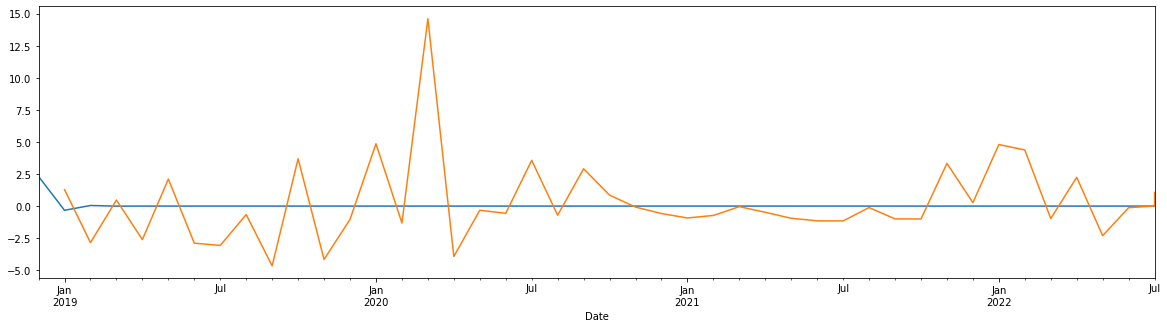

In [119]:
model_ret_arima=ARIMA(df_train.returns[1:], order=(1,1,1))
results_ret_arima = model_ret_arima.fit()

df_pred_arima = results_ret_arima.predict(start =start_date, end = end_date)

df_pred_arima[start_date:end_date].plot(figsize = (20,5))
df_test.returns.plot(figsize=(20,5))

In [120]:
results_ret_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                  177
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -647.983
Method:                       css-mle   S.D. of innovations              9.268
Date:                Mon, 18 Jul 2022   AIC                           1303.966
Time:                        18:15:03   BIC                           1316.671
Sample:                    03-01-2004   HQIC                          1309.119
                         - 11-01-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0132      0.012      1.111      0.266      -0.010       0.036
ar.L1.D.returns    -0.1418      0.074     -1.908      0.056      -0.287       0.004
ma.L1.D.returns    -1.0000      0.019    -53.991      0.000      -1.036      -0.964
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.0529           +0.0000j            7.0529            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""